<a href="https://colab.research.google.com/github/skaty5678/Working_with_EasyOCR/blob/main/Working_with_EasyOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Install and import dependencies**

In [1]:
!pip3 install torch torchvision torchaudio #installing pytorch


In [2]:
!pip install easyocr #installing easyocr

     |████████████████████████████████| 70.8 MB 13 kB/s 
     |████████████████████████████████| 47.6 MB 4.4 MB/s 


In [3]:
import easyocr
import cv2 #importing opencv to read images and videos 
import numpy as np
from matplotlib import pyplot as plt

#**Read in images and videos**

In [6]:
IMAGE_PATH = '/content/sample_data/surf.jpeg'

In [7]:
reader = easyocr.Reader(['en'])
result = reader.readtext(IMAGE_PATH)
result

[([[18, 18], [293, 18], [293, 145], [18, 145]], 'SURF', 0.9843162894248962)]

#**Draw results**

In [8]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

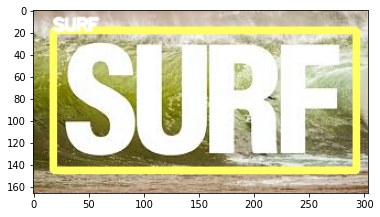

In [13]:
img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img,top_left,bottom_right,(255,255,100),5)
img = cv2.putText(img,text,top_left,font,.5,(255,255,255),2,cv2.LINE_AA)
plt.imshow(img)
plt.show()

#**Reading multiple lines**

In [15]:
IMAGE_PATH2 = '/content/sample_data/sign.jpeg'

In [16]:
reader2 = easyocr.Reader(['en'])
result2 = reader2.readtext(IMAGE_PATH2)
result2

[([[17, 183], [165, 183], [165, 201], [17, 201]],
  'HEAD PROTECTION',
  0.99774729791943),
 ([[29, 199], [153, 199], [153, 219], [29, 219]],
  'MUST BE WORN',
  0.5017843649087368),
 ([[39, 219], [145, 219], [145, 237], [39, 237]],
  'ON THIS SITE',
  0.9745308775688132)]

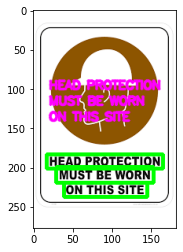

In [27]:
img2 = cv2.imread(IMAGE_PATH2)
spacer = 100
for detection in result2:
  top_left2 = tuple(detection[0][0])
  bottom_right2 = tuple(detection[0][2])
  text2 = detection[1]
  img2 = cv2.rectangle(img2,top_left2,bottom_right2,(0,255,0),3)
  img2 = cv2.putText(img2,text2,(20,spacer),font,.5,(255,0,255),2,cv2.LINE_AA)
  spacer+=20

plt.imshow(img2)
plt.show()